## 2022-08-13

In [125]:
import pandas as pd 

df = pd.read_csv('/Users/kibeomkim/Desktop/auto.csv') ; df 

,NAME,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MPG
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,16.0
4,ford torino,8,302.0,140,3449,10.5,17.0
...,...,...,...,...,...,...,...
393,ford mustang gl,4,140.0,86,2790,15.6,27.0
394,vw pickup,4,97.0,52,2130,24.6,44.0
395,dodge rampage,4,135.0,84,2295,11.6,32.0
396,ford ranger,4,120.0,79,2625,18.6,28.0


In [19]:
df.describe()

,CYLINDERS,DISPLACEMENT,WEIGHT,ACCELERATION,MPG
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,23.514573
std,1.701004,104.269838,846.841774,2.757689,7.815984
min,3.000000,68.000000,1613.000000,8.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,46.600000


In [20]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NAME          398 non-null    object 
 1   CYLINDERS     398 non-null    int64  
 2   DISPLACEMENT  398 non-null    float64
 3   HORSEPOWER    398 non-null    object 
 4   WEIGHT        398 non-null    int64  
 5   ACCELERATION  398 non-null    float64
 6   MPG           398 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 21.9+ KB


In [21]:
df.isnull().sum() 

NAME            0
CYLINDERS       0
DISPLACEMENT    0
HORSEPOWER      0
WEIGHT          0
ACCELERATION    0
MPG             0
dtype: int64

### 데이터 전처리 (데이터파이프라인)

In [22]:
df.drop('NAME', axis=1, inplace=True)

In [25]:
df

,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MPG
0,8,307.0,130,3504,12.0,18.0
1,8,350.0,165,3693,11.5,15.0
2,8,318.0,150,3436,11.0,18.0
3,8,304.0,150,3433,12.0,16.0
4,8,302.0,140,3449,10.5,17.0
...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,27.0
394,4,97.0,52,2130,24.6,44.0
395,4,135.0,84,2295,11.6,32.0
396,4,120.0,79,2625,18.6,28.0


In [31]:
# 데이터셋에 모든 값 숫자로 변환 
df = df.apply(pd.to_numeric, errors='coerce')

In [32]:
# null값 혹시라도 존재할 경우 모두 0으로 채워넣어라
df.fillna(0, inplace=True)

In [126]:
# 데이터 파이프라인 정의 
def pipeline(df) : 
    df.drop('NAME', axis=1, inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')
    df.fillna(0, inplace=True)
    return df 
df = pipeline(df)

In [42]:
df

,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MPG
0,8,307.0,130.0,3504,12.0,18.0
1,8,350.0,165.0,3693,11.5,15.0
2,8,318.0,150.0,3436,11.0,18.0
3,8,304.0,150.0,3433,12.0,16.0
4,8,302.0,140.0,3449,10.5,17.0
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,27.0
394,4,97.0,52.0,2130,24.6,44.0
395,4,135.0,84.0,2295,11.6,32.0
396,4,120.0,79.0,2625,18.6,28.0


In [127]:
# 전처리 후, 훈련셋과 검증셋으로 데이터셋 나누기 
print(df.shape)
from sklearn.model_selection import train_test_split 

# 타겟
y = df['MPG'].values
# 특성변수들 
X = df.values 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

(398, 6)


In [128]:
# 선형회귀 모델 훈련시키기 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()

# 회귀모델 훈련 
regressor.fit(x_train, y_train)

LinearRegression()

In [129]:
y_pred = regressor.predict(x_test)

# Regressor 성능 평가 ; RMSE
from sklearn.metrics import mean_squared_error 
from math import sqrt
print(sqrt(mean_squared_error(y_test, y_pred))) 

2.7248410669138417e-14


### 의사결정 회귀나무 모델 


In [100]:
from sklearn.tree import DecisionTreeRegressor

# 최대 깊이=3 인 의사결정 회귀나무 정의 
regressor = DecisionTreeRegressor(max_depth=3)

# 모델 훈련 
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [101]:
# 테스트 데이터에 대해 기댓값 근사치 예측 수행 
y_pred = regressor.predict(x_test)

In [102]:
print(sqrt(mean_squared_error(y_test, y_pred)))

1.4008722335107024


### 그레디언트 부스팅 모델로 회귀문제 해결하기 

In [105]:
from sklearn.ensemble import GradientBoostingRegressor 

# 그레디언트 부스팅 회귀모델 정의 
regressor = GradientBoostingRegressor(n_estimators=500, max_depth=4, min_samples_split=2, learning_rate=0.01, loss='ls')

# 회귀모델 훈련 
regressor.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_depth=4,
                          n_estimators=500)

In [112]:
# 테스트셋 예측 
y_pred = regressor.predict(x_test)

# 회귀모델 성능 
print(sqrt(mean_squared_error(y_test, y_pred)))
print('단일 의사결정 회귀나무 보다, 의사결정회귀나무 앙상블이 성능 더 좋았다 (1.4 > 0.265)')

0.265994740897516
단일 의사결정 회귀나무 보다, 의사결정회귀나무 앙상블이 성능 더 좋았다 (1.4 > 0.265)


In [118]:
result = pd.DataFrame({
    'Algorithm' : ['Linear regression', 'Regression tree', 'Gradient Boosting'], 
    'RMSE' : [2.7404298600226993e-15, 1.4008722335107024, 0.265994740897516] 
})
result

,Algorithm,RMSE
0,Linear regression,2.740430e-15
1,Regression tree,1.400872e+00
2,Gradient Boosting,2.659947e-01


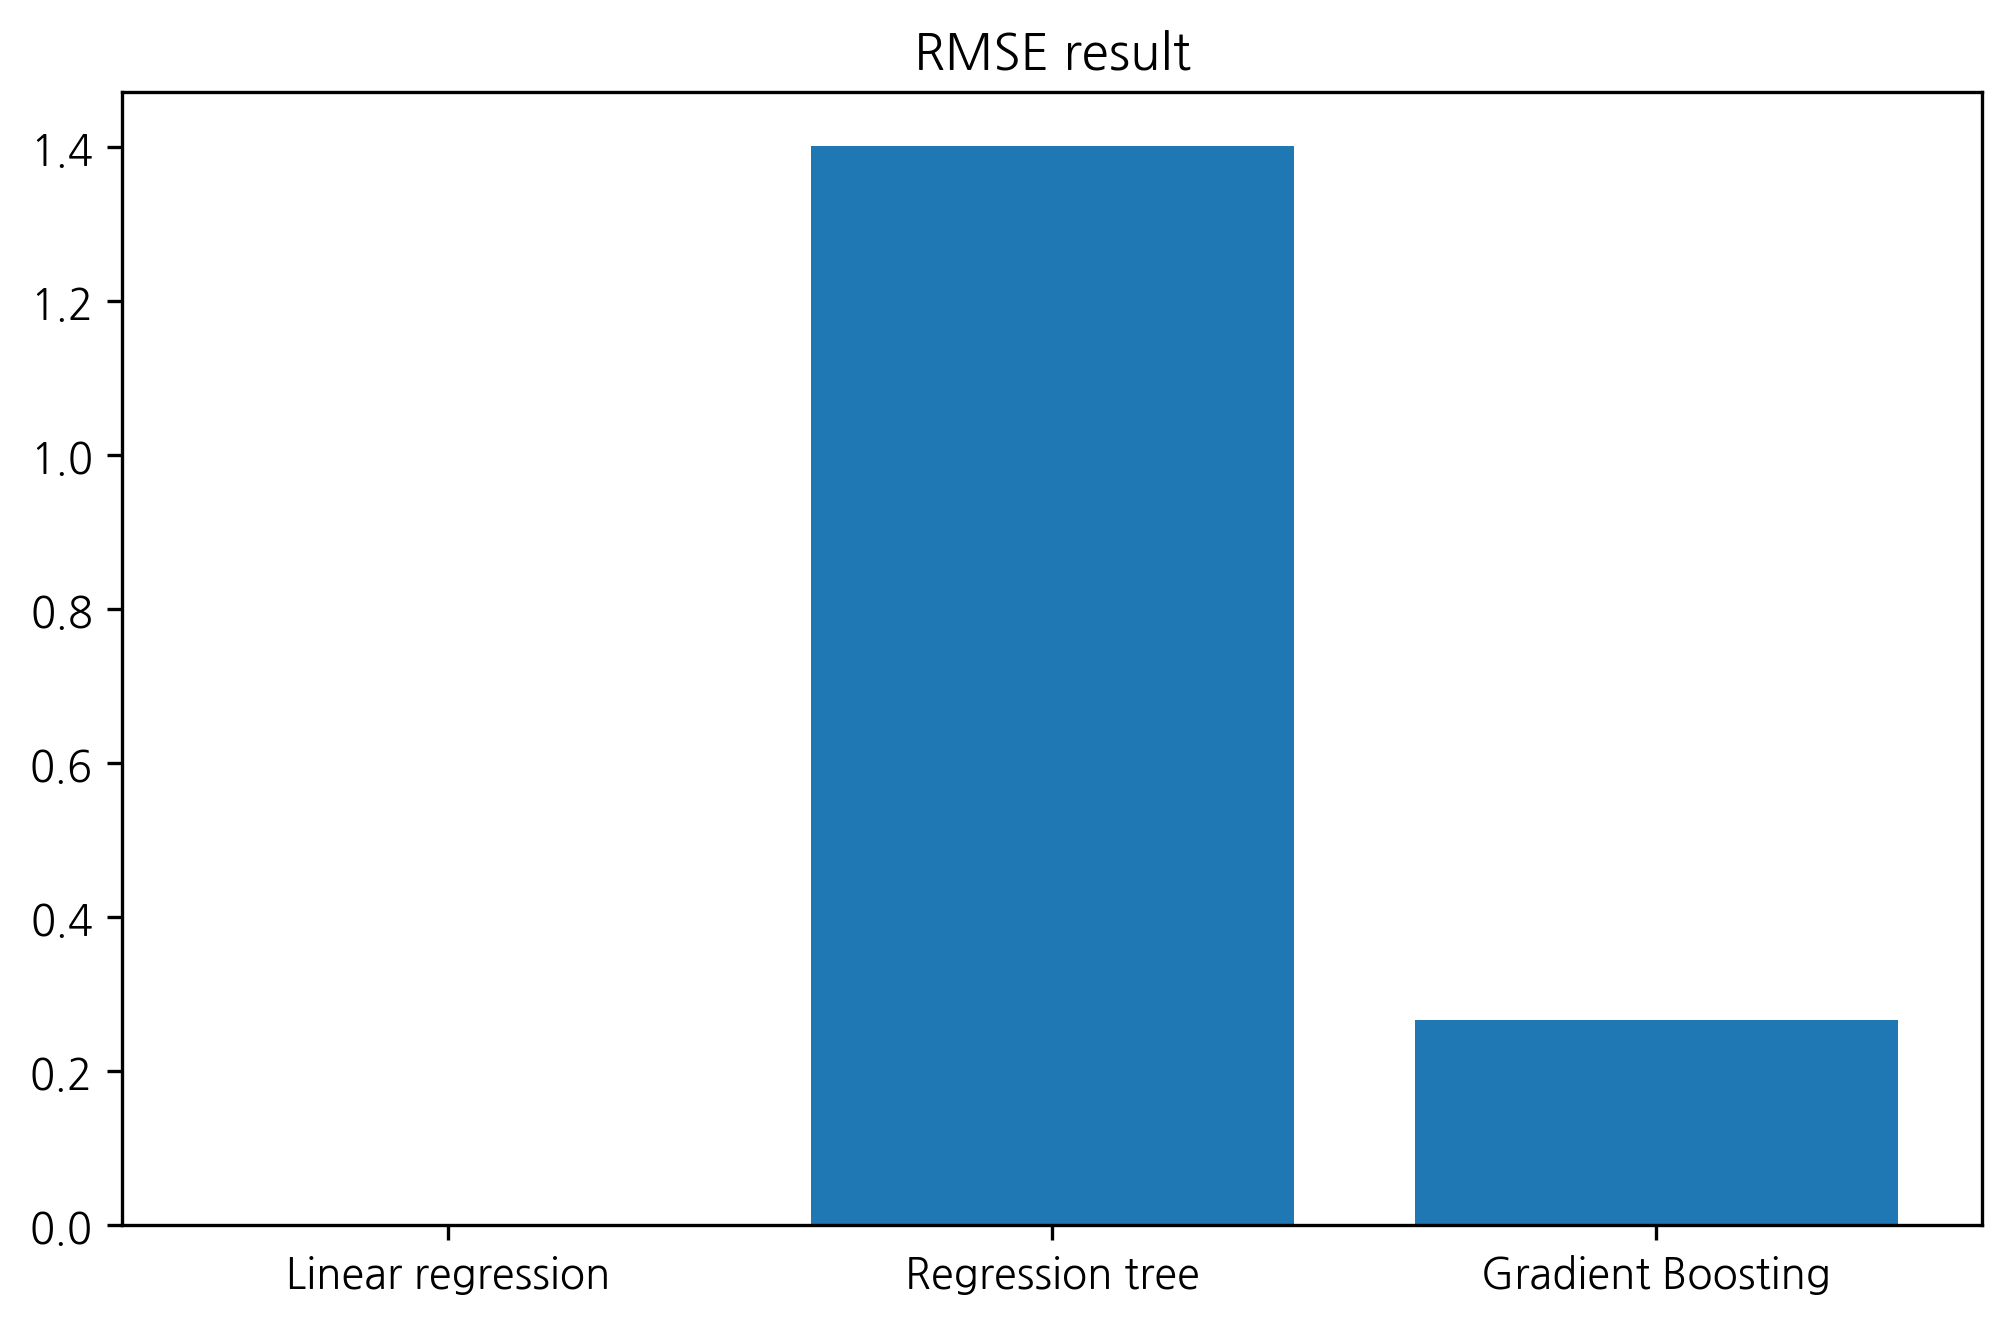

In [124]:
plt.bar(range(len(result['RMSE'].values )), result['RMSE'].values )
plt.xticks(range(len(result['RMSE'].values)), result['Algorithm'].values)
plt.title('RMSE result')
plt.show() 

### 선형회귀모델, 그레디언트 부스팅, 의사결정 회귀나무 순으로 성능 잘 나왔다. 

# 배운 내용 응용하기 

In [182]:
# 데이터셋 로드 
df = pd.read_csv('/Users/kibeomkim/Desktop/weather.csv')
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2007-11-01,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2007-11-02,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,2007-11-03,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,2007-11-04,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,2007-11-05,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2008-10-27,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,2008-10-28,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,2008-10-29,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,2008-10-30,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [183]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           366 non-null    object 
 1   MinTemp        366 non-null    float64
 2   MaxTemp        366 non-null    float64
 3   Rainfall       366 non-null    float64
 4   Evaporation    366 non-null    float64
 5   Sunshine       363 non-null    float64
 6   WindGustDir    363 non-null    object 
 7   WindGustSpeed  364 non-null    float64
 8   WindDir9am     335 non-null    object 
 9   WindDir3pm     365 non-null    object 
 10  WindSpeed9am   359 non-null    float64
 11  WindSpeed3pm   366 non-null    int64  
 12  Humidity9am    366 non-null    int64  
 13  Humidity3pm    366 non-null    int64  
 14  Pressure9am    366 non-null    float64
 15  Pressure3pm    366 non-null    float64
 16  Cloud9am       366 non-null    int64  
 17  Cloud3pm       366 non-null    int64  
 18  Temp9am   

In [184]:
df.describe() 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [185]:
df.isnull().sum() 

Date              0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [186]:
mean = df['WindGustSpeed'].mean()
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(mean)

In [187]:
mean = df['Sunshine'].mean()
df['Sunshine'] = df['Sunshine'].fillna(mean)

In [188]:
df['WindSpeed9am'] = df[['WindGustDir', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am']].iloc[:,3].fillna(df['WindSpeed9am'].mean())

In [189]:
df.drop('Date', axis=1, inplace=True)

In [193]:
df.drop('RainTomorrow', axis=1, inplace=True)

In [194]:
df.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8


In [192]:
y = df['RainTomorrow'].values

In [198]:
y_idx = np.where(y=='Yes')
n_idx = np.where(y=='No')

y[y_idx] = 1 ; y[n_idx] = 0

In [207]:
# 타겟 
y # 이 값들 타겟으로 잡으면 이진분류 문제가 된다. 

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [215]:
# 5, 7, 8, 19
new_df = df.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1)

In [217]:
new_df.isnull().sum() 

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

In [219]:
X = new_df.values  ; X 

array([[ 8. , 24.3,  0. , ..., 14.4, 23.6,  3.6],
       [14. , 26.9,  3.6, ..., 17.5, 25.7,  3.6],
       [13.7, 23.4,  3.6, ..., 15.4, 20.2, 39.8],
       ...,
       [12.5, 19.9,  0. , ..., 14.5, 18.3,  0. ],
       [12.5, 26.9,  0. , ..., 15.8, 25.9,  0. ],
       [12.3, 30.2,  0. , ..., 23.8, 28.6,  0. ]])

In [231]:
x_train, x_test, y_train, y_test = train_test_split(X, np.array(list(y)), test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [235]:
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred) 
print(f'로지스틱회귀 이진분류 모델 정확도:{round(acc_score*100, 2)}%')

로지스틱회귀 이진분류 모델 정확도:97.83%
